In [20]:
%matplotlib inline
import collections
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

data from https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [21]:
file = open('imdb_labelled.txt')
text = []
positivity = []

for line in file:
    text.append(line[:-2].strip())
    positivity.append(int(line[-2]))
    
df = pd.DataFrame()
df["text"] = text 
df["positivity"] = positivity
df.head()

,text,positivity
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


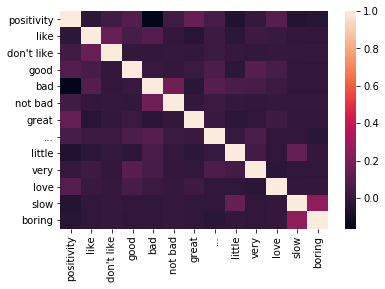

In [23]:
keyword1 = ['like',"don't like", 'good', 'bad']

for key in keyword1:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

sns.heatmap(df.corr())

In [17]:
data = df[keywords]
target = df['positivity']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 429


In [18]:
# see how our model does against other data sets
file = open('yelp_labelled.txt')
text = []
positivity = []

for line in file:
    text.append(line[:-2].strip())
    positivity.append(int(line[-2]))
    
df_yelp  = pd.DataFrame()
df_yelp["text"] = text 
df_yelp["positivity"] = positivity
#df_yelp.head()

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df_yelp[str(key)] = df.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
data = df_yelp[keywords]
target = df_yelp['positivity']

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 487


In [19]:
# see how our model does against other data sets
file = open('amazon_cells_labelled.txt')
text = []
positivity = []

for line in file:
    text.append(line[:-2].strip())
    positivity.append(int(line[-2]))
    
df_amz  = pd.DataFrame()
df_amz["text"] = text 
df_amz["positivity"] = positivity
#df_yelp.head()

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df_amz[str(key)] = df.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
data = df_amz[keywords]
target = df_amz['positivity']

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 511
